In [1]:
#color scheme
import matplotlib as mpl
import numpy as np

clev = np.linspace(0,0.36,19)
new_colors = ['#FFFFFF','#50D0D1','#01FFFF','#01C000','#80E000',
             '#FFFF02','#FFA001','#FE0000','#FF2280','#801FFE',
             '#4040FE','#202080','#202020','#808080','#E0E0E0',
             '#DAA677','#A06C3B','#663200']

new_cmap = mpl.colors.ListedColormap( new_colors )
new_cmap.set_over(new_colors[-1])
new_cmap.set_under(new_colors[0])
norm = mpl.colors.BoundaryNorm(clev, new_cmap.N)

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
%matplotlib inline

plt.rcParams.update({'font.size': 13})

HOME=os.path.expanduser("~")
opath='%s/B6/Hyunju/prepare-dyamond/' % HOME

# Figure 1

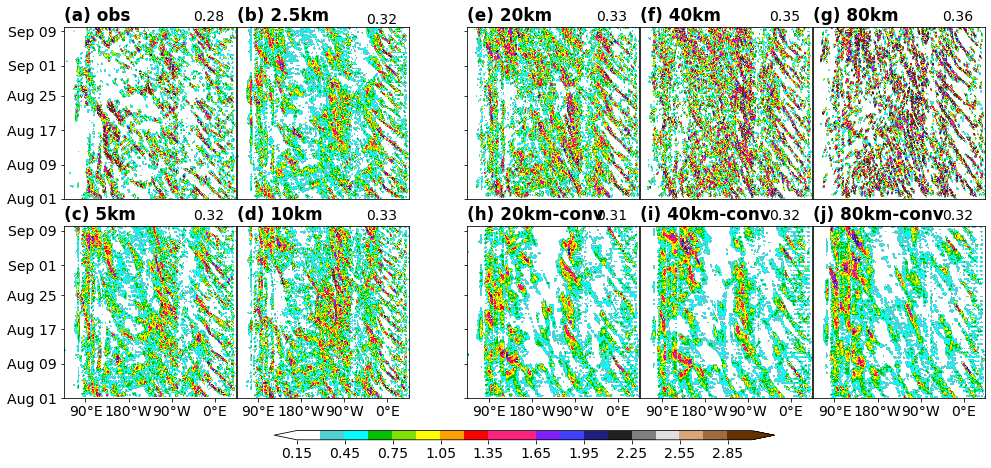

In [6]:
titles=['IMERG','ICON-2.5km','ICON-20km','ICON-40km','ICON-80km',
        'ICON-5km','ICON-10km','ICON-20km-conv','ICON-40km-conv','ICON-80km-conv']
#plt.style.use('dark_background')
fig_label=['(a)','(b)', '(e)', '(f)', '(g)', 
            '(c)','(d)', '(h)', '(i)', '(j)']

def plot_10():
    col_num = 5
    row_num = 2
    
    fig = plt.figure(figsize=(col_num*2.78,row_num*3.22))
    
    ax1 = plt.subplot2grid(shape=(2,16), loc=(0,0), colspan=3)
    ax2 = plt.subplot2grid((2,16), (0,3), colspan=3)
    ax3 = plt.subplot2grid((2,16), (0,7), colspan=3)
    ax4 = plt.subplot2grid((2,16), (0,10), colspan=3)
    ax5 = plt.subplot2grid((2,16), (0,13), colspan=3)
    ax6 = plt.subplot2grid((2,16), (1,0), colspan=3)
    ax7 = plt.subplot2grid((2,16), (1,3), colspan=3)
    ax8 = plt.subplot2grid((2,16), (1,7), colspan=3)
    ax9 = plt.subplot2grid((2,16), (1,10), colspan=3)
    ax10 = plt.subplot2grid((2,16), (1,13), colspan=3)
    
    ax2.set_yticks([])
    #ax3.set_yticks([])
    ax4.set_yticks([])
    ax5.set_yticks([])
    ax7.set_yticks([])
    #ax8.set_yticks([])
    ax9.set_yticks([])
    ax10.set_yticks([])
    
    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xticks([])
    ax5.set_xticks([])
    
    axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
    return fig, axs

fig, axs = plot_10()
fig.subplots_adjust(wspace=0.02, hspace=0.16, bottom=0.15, top=0.95, left=0.06, right=0.98)
monthyearFmt = mdates.DateFormatter('%b %d')
clev = np.arange(0.15,3.1,0.15)

for i, od in enumerate(titles):
    #raw precip
    if od == 'IMERG':
        ds=xr.open_dataset('%s/WK-filtering/imerg_1x1.nc' % opath)
        prec=ds.precip.where(ds.time >= np.datetime64('2016-08-01T00'), drop=True)
        prec=prec.where(prec.time <= np.datetime64('2016-09-10T00'), drop=True)
        prec=prec.where((prec.lat >=5.) &(prec.lat <= 15.), drop=True)
        prec=prec*24.
        od = 'obs'

    else:
        ds=xr.open_dataset('%s%s/prec_1x1.nc' % (opath, od))
        prec = ds.prec.where((ds.lat >= 5.) & (ds.lat <=15.), drop=True)
        prec = prec*4.
        od = od[5:]
            
    prec_reorder = xr.concat([prec.sel(lon=slice(45,179.99)).copy(),prec.sel(lon=slice(-180,-0.001)).copy(),prec.sel(lon=slice(0,44.99)).copy()], dim='lon')
    prec_reorder['lon'] = np.arange(-315,45,1)
    time_pd = pd.to_datetime(prec_reorder.time.values)
    im=axs[i].contourf(prec_reorder.lon.values, prec_reorder.time.values, prec_reorder.mean('lat')/24.,
                     cmap=new_cmap, levels=clev, extend='both')

    axs[i].set_title('%s %s' % (fig_label[i], od), fontweight="bold", loc="left")
    prec_mark=prec.mean().values/24.
    axs[i].text(-45, np.datetime64('2016-09-11T12'), "%.2f" % prec_mark)
    

axs[0].set_yticks(axs[0].get_yticks()[::2])
axs[0].yaxis.set_major_formatter(monthyearFmt)
axs[0].tick_params(axis='y')
axs[2].set_yticks(axs[0].get_yticks())
axs[2].set_yticklabels([])
axs[5].set_yticks(axs[0].get_yticks())
axs[5].yaxis.set_major_formatter(monthyearFmt)
axs[5].tick_params(axis='y')
axs[7].set_yticks(axs[0].get_yticks())
axs[7].set_yticklabels([])

xthicks = ['90\u00b0E','180\u00b0W','90\u00b0W','0\u00b0E']
for i in range(5,10):
    axs[i].set_xticks([-270,-180,-90,0])
    axs[i].set_xticklabels(xthicks)
    axs[i].set_xticklabels(xthicks)
    
cbaxes = fig.add_axes([0.27, 0.06, 0.5, 0.02]) #[left, bottom, width, height]
cb=fig.colorbar(im,cax = cbaxes, orientation='horizontal')#, ticks=np.arange(-5,6,2))

#fig.patch.set_facecolor('white')
#plt.savefig('precip_5_15N.png', dpi=150)

# Figure 2

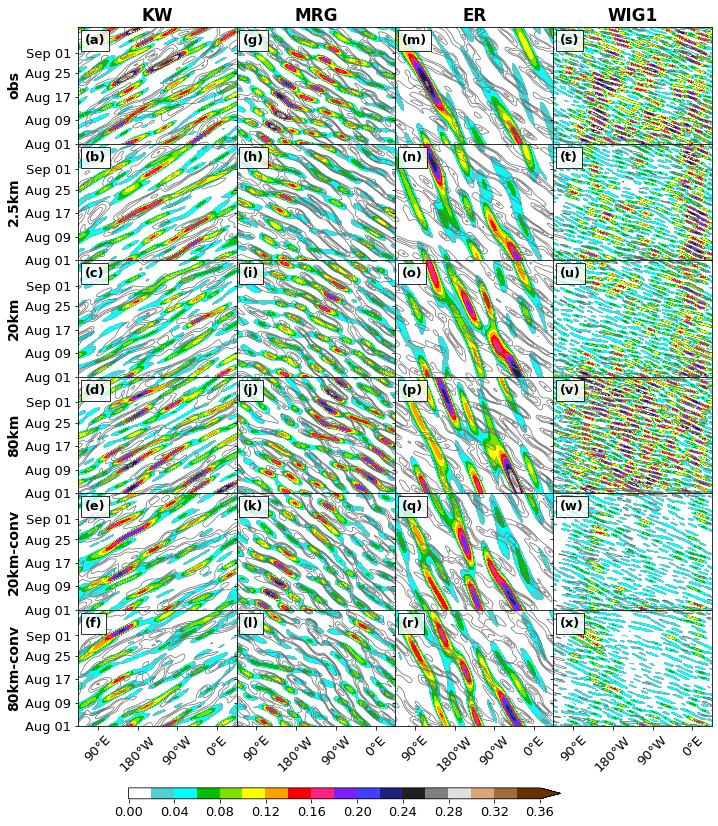

In [7]:
#import string
plt.rcParams.update({'font.size': 14})


fig_label = [ '(a)', '(g)', '(m)', '(s)', 
             '(b)', '(h)', '(n)', '(t)',
             '(c)', '(i)', '(o)', '(u)',
             '(d)', '(j)', '(p)', '(v)',
             '(e)', '(k)', '(q)', '(w)',
             '(f)', '(l)', '(r)', '(x)']

waves = ['Kelvin','MRG','ER','WIG1']
Yang_wv = ['Kelvin','WMRG','R1','WG1']
titles=['IMERG','ICON-2.5km','ICON-20km','ICON-80km', 'ICON-20km-conv','ICON-80km-conv']

sel_lat = {'Kelvin': 0.,'WG1': 0.,'WG2': 7.,
           'WMRG':0, 'EMRG':0, 'R1': 8.,'R2': 13., 'EG1':7.}
wv_wind = {'Kelvin': 'u_wave','WG1':'u_wave','WG2':'u_wave',
           'WMRG':'v_wave','EMRG': 'v_wave','R1':'v_wave','R2':'v_wave', 'EG1':'v_wave'}

#plt.style.use('dark_background')

col_num = len(titles)
row_num = len(waves)
fig, axs = plt.subplots(col_num, row_num, sharex=True, sharey=True, figsize=(row_num*2.5,col_num*1.95))

fig.subplots_adjust(wspace=0, hspace=0, bottom=0.12, top=0.95, left=0.1, right=0.98)
monthyearFmt = mdates.DateFormatter('%b %d')
clev = [-10,-5,-3,-1]

for i, od in enumerate(titles):
    ds = xr.open_dataset('%s%s/WK_filtered_precip_5_15N_with_anomaly.nc' % (opath, od))
    ds = ds.sel(time=slice(np.datetime64('2016-08-01T00'), np.datetime64('2016-09-09T18')))
    
    if od == 'IMERG':
        od = 'ecmwf'
        
    for j,wv in enumerate(waves):
        var = ds[wv]
        #var = var.where(var >0., 0.)
        var_reorder = xr.concat([var.sel(lon=slice(45,179.99)).copy(),var.sel(lon=slice(-180,-0.001)).copy(),var.sel(lon=slice(0,44.99)).copy()], dim='lon')
        var_reorder['lon'] = np.arange(-315,45,1)
        im=axs[i,j].contourf(var_reorder.lon, var_reorder.time.values, var_reorder, cmap=new_cmap,
                           levels=np.linspace(0,0.36,19), extend='max')
        
        wv = Yang_wv[j]
        ds_yang = xr.open_dataset('%s%s/yang_%s.nc' % (opath, od, wv))
        ds_yang = ds_yang.sel(time=slice(np.datetime64('2016-08-01T00'), np.datetime64('2016-09-09T18')))
        var = ds_yang[wv_wind[wv]].sel(lat = sel_lat[wv]).isel(plev=0)

        var_reorder = xr.concat([var.sel(lon=slice(45,179.99)).copy(),var.sel(lon=slice(-180,-0.001)).copy(),var.sel(lon=slice(0,44.99)).copy()], dim='lon')
        var_reorder['lon'] = np.arange(-315,45,1)
        axs[i,j].contour(var_reorder.lon, var_reorder.time.values, var_reorder[0,...], levels=clev, linewidths=0.7,
                         colors='dimgray', linestyles='solid')
                         #colors='black', linewidths=0.7)
                            #extend='both', cmap='RdBu')
        
        tbox=axs[i,j].text(-300, np.datetime64('2016-09-04T00'), fig_label[i*4+j], fontsize=13, fontweight='bold')
        tbox.set_bbox(dict(facecolor='white', alpha=0.8))


axs[0,0].set_yticks(axs[0,0].get_yticks()[::2][:-1])
axs[1,0].yaxis.set_major_formatter(monthyearFmt)

for i in range(col_num):
    if i != 0:
        axs[i,0].set_ylabel(titles[i][5:], fontweight="bold")
    else:
        axs[i,0].set_ylabel('obs', fontweight="bold")

for i in range(row_num):
    if waves[i] == 'Kelvin':
        waves[i] = 'KW'
    axs[0,i].set_title(waves[i],fontweight="bold")

axs[3,0].set_xticks([-270,-180,-90,0])
xthicks = ['90\u00b0E','180\u00b0W','90\u00b0W','0\u00b0E']
axs[3,0].set_xticklabels(xthicks)
for ax in axs.flat:
    ax.set_xticklabels(xthicks, fontsize=13, rotation=45)
    ax.tick_params(axis='y', labelsize=13)
    ax.set_ylim(np.datetime64('2016-08-01T00'), np.datetime64('2016-09-09T18'))

cbaxes = fig.add_axes([0.17, 0.034, 0.6, 0.013]) #[left, bottom, width, height]
cb=fig.colorbar(im,cax = cbaxes, orientation='horizontal')#, ticks=np.arange(-5,6,2))
cb.ax.tick_params(labelsize=13)

#plt.savefig('wave_Hov.png', dpi=150)

# Figure S1

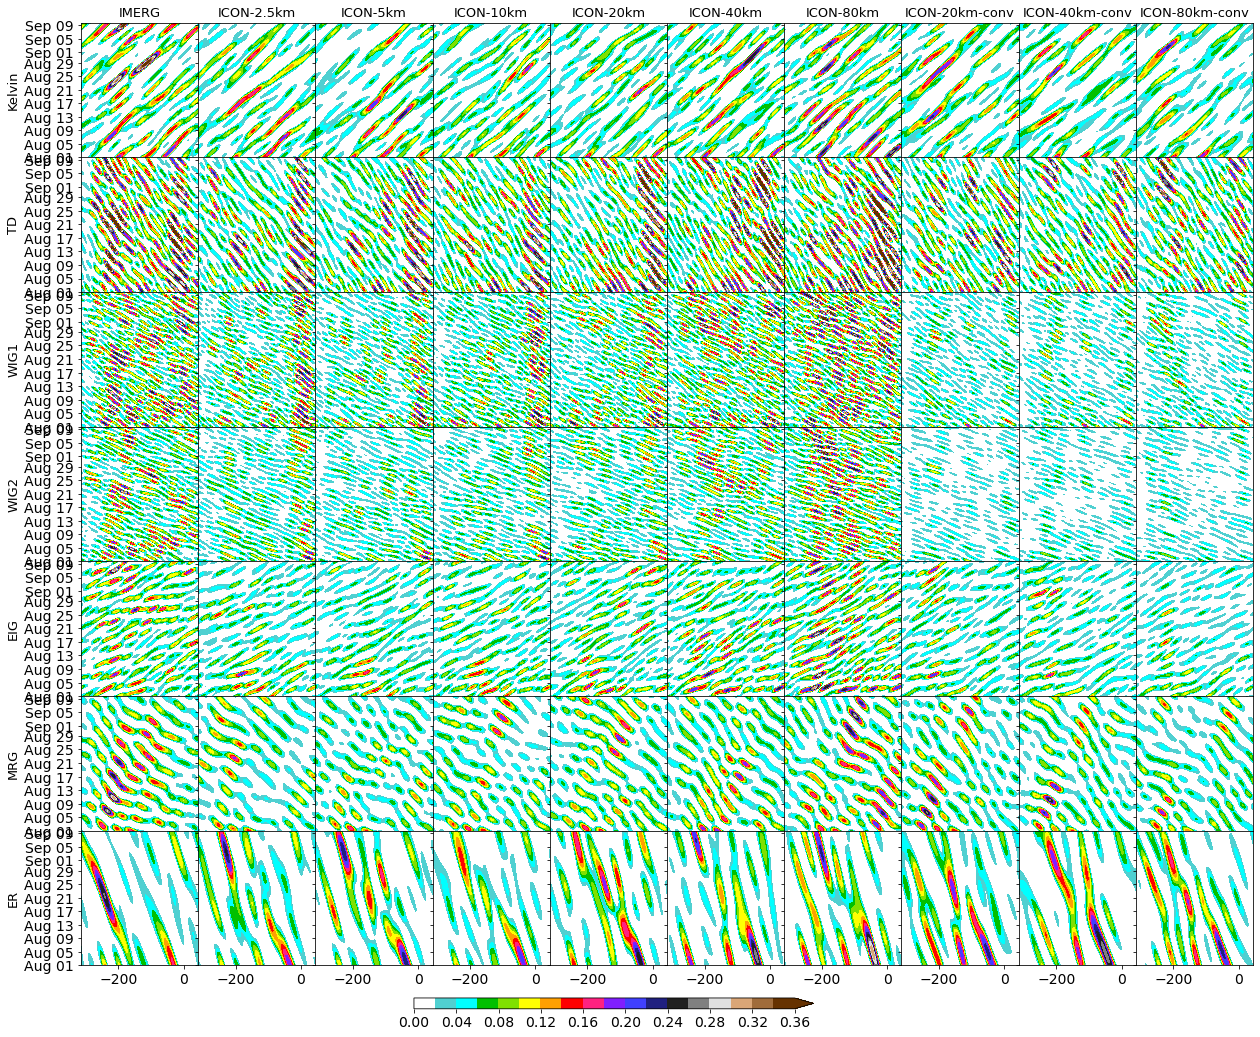

In [8]:
waves = ['Kelvin','TD','WIG1','WIG2','EIG','MRG','ER']
titles=['IMERG','ICON-2.5km','ICON-5km','ICON-10km','ICON-20km','ICON-40km','ICON-80km',
        'ICON-20km-conv','ICON-40km-conv','ICON-80km-conv']

#plt.style.use('dark_background')
clev = np.linspace(0,0.36,19)

col_num = len(titles)
row_num = len(waves)
fig, axs = plt.subplots(row_num, col_num, sharex=True, sharey=True, figsize=(col_num*1.85,row_num*2.15))

fig.subplots_adjust(wspace=0, hspace=0, bottom=0.08, top=0.95, left=0.1, right=0.98)
monthyearFmt = mdates.DateFormatter('%b %d')

for i, od in enumerate(titles):
    ds = xr.open_dataset('%s%s/WK_filtered_precip_5_15N_with_anomaly.nc' % (opath, od))
    ds = ds.sel(time=slice(np.datetime64('2016-08-01T00'), np.datetime64('2016-09-09T18')))
    for j,wv in enumerate(waves):
        var = ds[wv]
        var_reorder = xr.concat([var.sel(lon=slice(45,179.99)).copy(),var.sel(lon=slice(-180,-0.001)).copy(),var.sel(lon=slice(0,44.99)).copy()], dim='lon')
        var_reorder['lon'] = np.arange(-315,45,1)
        im=axs[j,i].contourf(var_reorder.lon, var_reorder.time.values, var_reorder, cmap=new_cmap,
                           levels=clev, extend='max')
        
axs[1,0].yaxis.set_major_formatter(monthyearFmt)
for i in range(col_num):
    axs[0,i].set_title(titles[i], fontsize=13)

for i in range(row_num):
    axs[i,0].set_ylabel(waves[i], fontsize=13)

    
cbaxes = fig.add_axes([0.35, 0.04, 0.3, 0.01]) #[left, bottom, width, height]
cb=fig.colorbar(im,cax = cbaxes, orientation='horizontal')#, ticks=np.arange(-5,6,2))

#plt.savefig('fig/hov.png')

# Figure S2

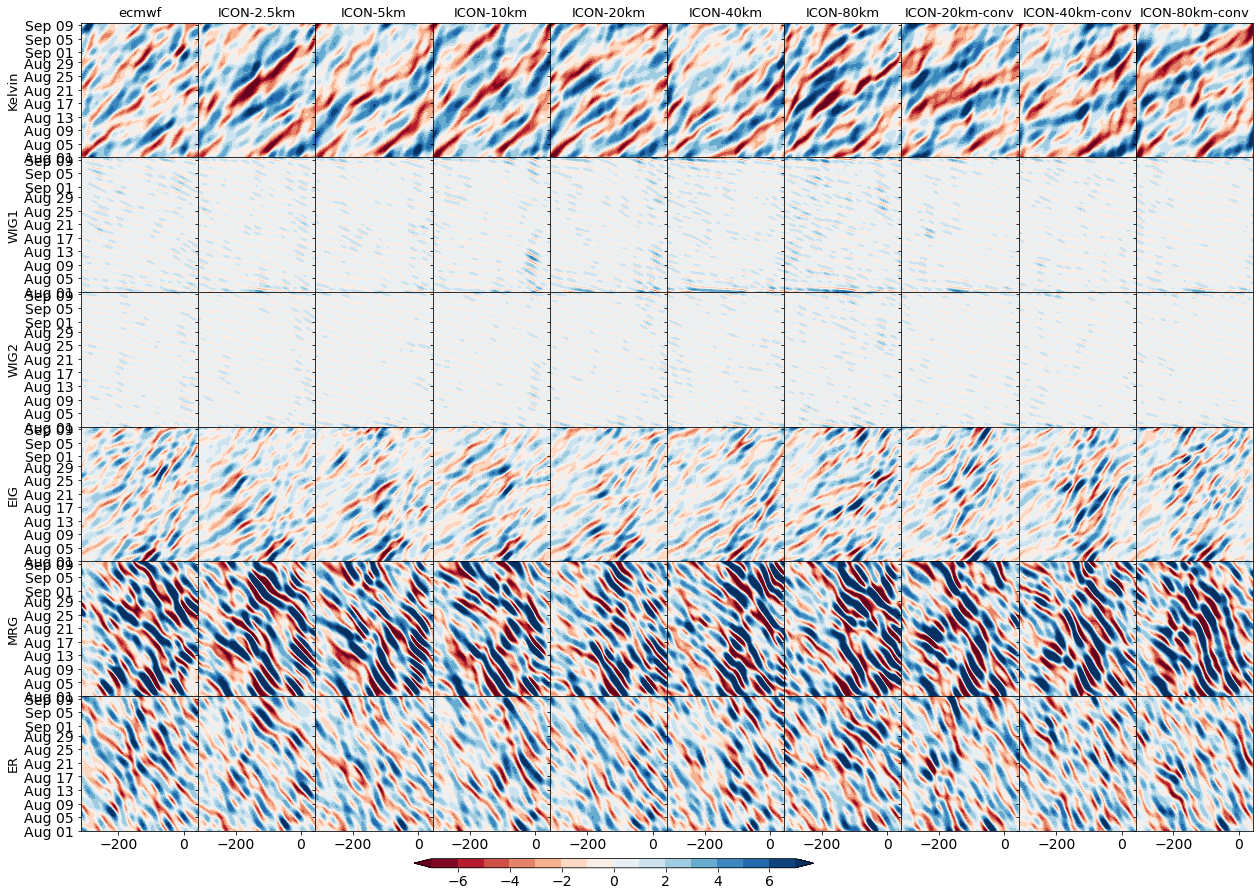

In [10]:
waves = ['Kelvin','WG1','WG2','EMRG','WMRG','R1']
titles=['ecmwf','ICON-2.5km','ICON-5km','ICON-10km','ICON-20km','ICON-40km',
        'ICON-80km','ICON-20km-conv','ICON-40km-conv','ICON-80km-conv']
col_num = len(titles)
row_num = len(waves)

#plt.style.use('dark_background')
fig, axs = plt.subplots(row_num, col_num, sharex=True, sharey=True, figsize=(col_num*1.85,row_num*2.15))
sel_lat = {'Kelvin': 0.,'WG1': 0.,'WG2': 7.,
           'WMRG':0, 'EMRG':0, 'R1': 8.,'R2': 13., 'EG1':7.}
wv_wind = {'Kelvin': 'u_wave','WG1':'u_wave','WG2':'u_wave',
           'WMRG':'v_wave','EMRG': 'v_wave','R1':'v_wave','R2':'v_wave', 'EG1':'v_wave'}

fig.subplots_adjust(wspace=0, hspace=0, bottom=0.08, top=0.95, left=0.1, right=0.98)
clev =np.linspace(-7,7,15) 
for i, od in enumerate(titles):
    for j, wv in enumerate(waves):
        ds = xr.open_dataset('%s%s/yang_%s.nc' % (opath, od, wv))
        var = ds[wv_wind[wv]].sel(lat = sel_lat[wv]).isel(plev=0)[0,...]

        var_reorder = xr.concat([var.sel(lon=slice(45,179.99)).copy(),var.sel(lon=slice(-180,-0.001)).copy(),var.sel(lon=slice(0,44.99)).copy()], dim='lon')
        var_reorder['lon'] = np.arange(-315,45,1)
        
        im=axs[j,i].contourf(var_reorder.lon, var.time.values, var_reorder, levels=clev,
                            extend='both', cmap='RdBu')
        
monthyearFmt = mdates.DateFormatter('%b %d')
axs[1,0].yaxis.set_major_formatter(monthyearFmt)

for i in range(col_num):
    axs[0,i].set_title(titles[i], fontsize=13)

wave_name = ['Kelvin', 'WIG1', 'WIG2', 'EIG', 'MRG', 'ER']
for i in range(row_num):
    axs[i,0].set_ylabel(wave_name[i], fontsize=13)

cbaxes = fig.add_axes([0.35, 0.04, 0.3, 0.01]) #[left, bottom, width, height]
cb=fig.colorbar(im,cax = cbaxes, orientation='horizontal')